# llm-society: Getting Started

This short tutorial shows how to install, configure, and use `llm-society` to simulate claim diffusion, either via a simple contagion or with LLM-driven conversations.

Sections:
- Installation and setup
- Quick start (simple mode, no API calls)
- Object-oriented API (LLM mode)
- Config + programmatic run
- CLI usage

## Installation and setup

```bash
pip install llm-society
```

For LLM-driven mode, set your OpenAI API key:
```bash
export OPENAI_API_KEY=sk-...your_key...
```
You can also save it in `api-key.txt` (one line). The library will read from `OPENAI_API_KEY` or `OPENAI_API_KEY_FILE`.



In [ ]:
import os
os.environ['OPENAI_API_KEY'] = "sk-.................."

## Constructing a Network

You must provide a non-empty `information` string. Three ways to construct:

- Direct kwargs:
```python
from llm_society import network
net = network(information="5G towers cause illness.", n=20, degree=3, rounds=5, depth=0.6, depth_max=4, mode="simple")
```
- From a config dict:
```python
cfg = {"n": 20, "edge_mean_degree": 3, "rounds": 5, "convo_depth_p": 0.6, "max_convo_turns": 4,
       "edge_sample_frac": 0.5, "seed_nodes": [0,1], "seed_belief": 0.9, "talk_information_prob": 0.5,
       "contagion_mode": "simple", "model": "gpt-4.1"}
net = network(information="5G towers cause illness.", config=cfg)
```
- From a config file:
```python
net = network(information="5G towers cause illness.", config_file="llm_society/data/example.yaml")
```


### Save animation while displaying

In [2]:
from llm_society import network

net = network(information="5G towers cause illness.", n=6, degree=3, rounds=3, depth=0.6, depth_max=4, mode='simple')
net.simulate()
net.plot(save="belief_evolution.mp4")


### Stepwise simulation and interruption

In [3]:
from llm_society import network

net = network(information="5G towers cause illness.", n=10, degree=3, rounds=10, depth=0.6, depth_max=4, mode="simple")

# advance 3 rounds, then stop
steps = 0
while net.step():
    steps += 1
    if steps >= 3:
        break

# plot any time after stopping
net.plot()


### # LLM mode (set OPENAI_API_KEY first or use api-key.txt)

In [4]:
from llm_society import network

net = network(
    information="5G towers cause illness.",
    n=5,
    degree=3,
    rounds=3,
    depth=0.6,
    depth_max=4,
    edge_frac=0.5,
    seeds=[0,1],
    seed_belief=0.98,
    mode="llm",
    rng=0,
)
net.simulate()
net.plot()


Round 0 summary: Most people reject the idea that 5G towers cause illness.

=== Conversation 2 <-> 3 ===
2: From what I've read, there's no real evidence that 5G towers actually cause illness. A lot of health experts have said it's safe and doesn't pose a threat.
3: Yeah, that's pretty much what I've seen too. All the scientific studies so far haven't found any real link between 5G towers and illness.
2: Exactly, I haven't seen any convincing evidence that 5G towers actually cause illness. It's mostly just rumors and misinformation that make people worry.
3: Yeah, I agree with you. From what I’ve read, there’s no solid proof linking 5G towers to health problems—people just get nervous when something new comes around.
2: Exactly, I feel like a lot of the worries about 5G are just rumors with no real evidence behind them. Most experts say it’s safe, so I’m not too concerned.
3: Yeah, I agree. From everything I’ve read, there’s really no solid proof that 5G towers actually cause any illne

### Persona segments example (two segments)

In [5]:
from llm_society import network

segments = [
    {
        "proportion": 0.6,
        "traits": {
            "gender": {"choices": {"Woman": 0.55, "Man": 0.43, "Nonbinary": 0.02}},
            "age": {"dist": "normal", "mean": 35, "std": 10, "min": 18, "max": 80},
            "political": {"choices": {"Democrat": 0.6, "Republican": 0.4}},
            "region": "Coastal",
        },
    },
    {
        "proportion": 0.4,
        "traits": {
            "gender": "Man",
            "age": {"uniform": [25, 60]},
            "profession": {"choices": {"Construction": 0.5, "Manufacturing": 0.5}},
        },
    },
]

net = network(information="Policy X is effective.", n=10, degree=3, rounds=5, depth=0.6, depth_max=4,
              mode="simple", segments=segments)
net.simulate()
net.plot()


### Data export: belief trajectories to a DataFrame

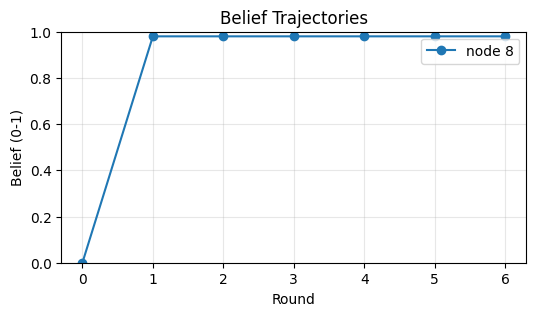

In [6]:
from llm_society import network
from llm_society.viz import belief_trajectories_table

net = network(information="Rumor R is true.", n=10, degree=3, rounds=6, depth=0.6, depth_max=4, mode="simple")
net.simulate()

df = belief_trajectories_table(net.history)
df.head()

net.nodes[8].plot()

## CLI usage

Write an example config:
```bash
llm-society --write-example-config my-config.yaml
```
Run a simulation:
```bash
llm-society --config my-config.yaml
```
Tip: set `contagion_mode: simple` to avoid LLM calls for fast runs.
